# 2020 Election Logistic Regression

In [ ]:
import pandas as pd
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import train_test_split

counties_df = pd.read_csv('US_Election_Counties_Dataset.csv')
states_df = pd.read_csv('US_Election_States_Dataset.csv')

pd.set_option('display.max_columns', None)

#Counties

## Creating Features and Targets

In [ ]:
X_counties = counties_df.iloc[:, 10:-1]
y_counties = counties_df.iloc[:, -1]

X_counties.head()

,Population with less than 9th grade education,"Population with 9th to 12th grade education, no diploma",High School graduate and equivalent,"Some College,No Degree",Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Median income (dollars),Mean income (dollars),Area in square Km,Density per square km,Total Population,Hispanic or Latino percentage,NH-White percentage,NH-Black percentage,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction
0,1.7,7.9,31.1,21.0,8.7,16.7,12.8,0.4541,68315.0,90372,1539.63,38.17,58805,3.60,70.71,19.30,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99
1,2.0,6.4,27.8,21.7,9.6,20.0,12.5,0.4648,71039.0,96027,4117.73,56.69,231767,5.47,80.47,7.77,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91
2,7.3,16.2,36.8,19.9,7.9,6.6,5.3,0.5098,39712.0,60128,2292.16,10.85,25223,5.99,43.95,46.98,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53
3,6.4,14.7,40.9,19.1,8.0,6.6,4.3,0.4553,50669.0,65131,1612.19,13.80,22293,3.32,73.75,19.69,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43
4,7.1,11.1,35.3,20.7,11.0,9.4,5.3,0.4475,57440.0,75954,1670.26,35.37,59134,9.76,84.15,1.40,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81


## Training & Predictions

In [ ]:
#
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_counties, y_counties,
                                                            test_size=0.2, shuffle=True, random_state=100)


#Run and train Logistic Model
model_counties = LogisticRegression(max_iter=50000, solver='liblinear', penalty='l2')
model_counties = model_counties.fit(X_train_c, y_train_c)


y_pred_c = model_counties.predict(X_test_c)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
print("Accuracy:")
print(sklearn.metrics.accuracy_score(y_test_c, y_pred_c))
print("Precision:")
print(sklearn.metrics.precision_score(y_test_c, y_pred_c))
print("Recall:")
print(sklearn.metrics.recall_score(y_test_c, y_pred_c))
print("F1:")
print(sklearn.metrics.f1_score(y_test_c, y_pred_c))
print("AUC:")
print(sklearn.metrics.roc_auc_score(y_test_c, y_pred_c))


Accuracy:
0.9236883942766295
Precision:
0.8850574712643678
Recall:
0.6695652173913044
F1:
0.7623762376237624
AUC:
0.8250549822365082


# Confusion Matrix

Confusion Matrix:
True Negatives (TN): 504
False Positives (FP): 10
False Negatives (FN): 38
True Positives (TP): 77


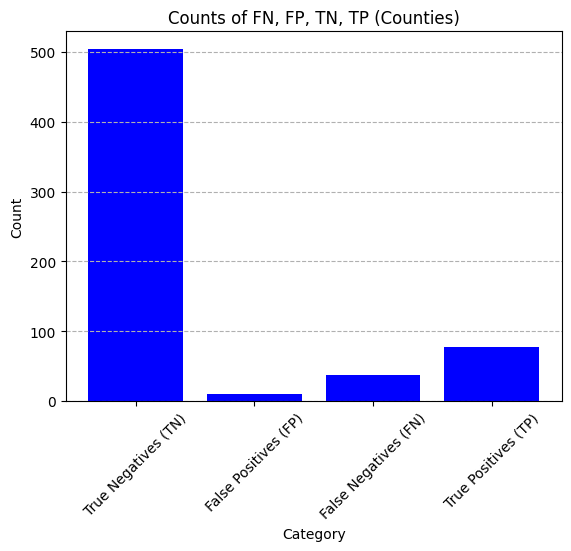

In [ ]:
cm = confusion_matrix(y_test_c, y_pred_c)
print("Confusion Matrix:")
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

categories = ['True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)', 'True Positives (TP)']
counts = [TN, FP, FN, TP]

plt.bar(categories, counts, color='blue')
plt.title('Counts of FN, FP, TN, TP (Counties)')
plt.ylabel('Count')
plt.xlabel('Category')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# States

## Creating Features and Targets

In [ ]:
X_states = states_df.iloc[:, 10:-7]
y_states = states_df.iloc[:, -1]

X_states.head()

,Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Mean income (dollars),Median income (dollars),Area in square Km,Hispanic or Latino percentage,NH-White percentage,NH-Black percentage,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,8.92,16.75,10.58,0.4673,70621.25,51690.19,131185.10,5.26,63.12,25.64,0.46,1.51,0.05,0.29,3.67,36.03,15.93,20.67,9.76,17.60
1,8.89,19.13,11.41,0.4105,94283.27,76687.50,1479016.90,6.79,57.51,2.83,14.84,5.93,1.70,0.62,9.78,38.64,18.04,19.59,11.56,12.17
2,9.11,19.70,12.23,0.4495,77329.40,59725.53,294366.12,30.65,53.37,4.44,3.69,3.48,0.20,0.44,3.73,38.98,17.93,22.86,9.15,11.08
3,7.82,15.73,9.19,0.4618,67296.48,49542.33,134660.48,8.53,68.52,14.94,0.68,1.70,0.47,0.27,4.89,35.20,16.47,20.50,10.28,17.54
4,7.99,21.88,13.58,0.4630,112918.57,82966.60,403673.31,39.40,34.69,5.36,0.39,15.12,0.35,0.57,4.12,41.15,17.70,19.99,9.04,12.13


## Training

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_states, y_states,
                                                            test_size=0.2, shuffle=True, random_state=100)

model_states= LogisticRegression(max_iter=50000, solver='liblinear', penalty='l2')
model_states = model_states.fit(X_train_s, y_train_s)

y_pred_s = model_states.predict(X_test_s)

In [ ]:
#State Level
print("Accuracy:")
print(sklearn.metrics.accuracy_score(y_test_s, y_pred_s))
print("Precision:")
print(sklearn.metrics.precision_score(y_test_s, y_pred_s))
print("Recall:")
print(sklearn.metrics.recall_score(y_test_s, y_pred_s))
print("F1:")
print(sklearn.metrics.f1_score(y_test_s, y_pred_s))
print("AUC:")
print(sklearn.metrics.roc_auc_score(y_test_s, y_pred_s))

Accuracy:
0.8181818181818182
Precision:
0.8
Recall:
0.8
F1:
0.8
AUC:
0.8166666666666667


# Confusion Matrix

Confusion Matrix:
True Negatives (TN): 5
False Positives (FP): 1
False Negatives (FN): 1
True Positives (TP): 4


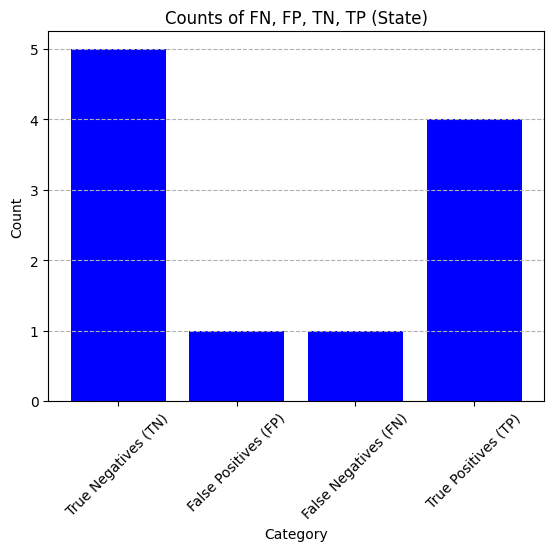

In [ ]:
cm = confusion_matrix(y_test_s, y_pred_s)
print("Confusion Matrix:")
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

categories = ['True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)', 'True Positives (TP)']
counts = [TN, FP, FN, TP]

plt.bar(categories, counts, color='blue')
plt.title('Counts of FN, FP, TN, TP (State)')
plt.ylabel('Count')
plt.xlabel('Category')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()